In [ ]:
# NAMA: SELVY DWI YULITA SARI
# NPM: 24083010095
# MATDIS (A)

In [ ]:
#Import library yang dibutuhkan
import pandas as pd

#Upload file dari komputer ke Colab (jika belum diupload, Colab akan memunculkan dialog upload)
from google.colab import files
uploaded = files.upload()

Saving Copy of DATA MAHASISWA MATDIS A.xlsx to Copy of DATA MAHASISWA MATDIS A.xlsx


In [ ]:
#Bersihkan dataset
import pandas as pd

# Baca file Excel
df = pd.read_excel("Copy of DATA MAHASISWA MATDIS A.xlsx", sheet_name="siswa.csv")

# Pilih hanya kolom yang relevan
df_clean = df[["NPM", "NAMA", "ADIL DAN AMANAH", "SUKA MEMBANTU",
               "NYAMBUNG KALAU NGOROL", "ASYIK DAN MENARIK"]].copy()

# Rename kolom
df_clean.columns = ["NPM", "Nama", "Adil_Amanah", "Suka_Membantu",
                    "Nyambung_Ngobrol", "Asyik_Menarik"]

print(df_clean.head())

           NPM                     Nama  Adil_Amanah  Suka_Membantu  \
0  24083010001     MADINA HEDY ALIFANTI          0.6            0.5   
1  24083010003      MARIA DWI KURNIASIH          0.3            0.1   
2  24083010005  ADINDA PUTRI RACHMAWATI          0.5            0.2   
3  24083010006           AQUINA SYABITA          0.7            0.6   
4  24083010007      VARID PUTRA PRATAMA          0.6            0.7   

   Nyambung_Ngobrol Asyik_Menarik  
0               0.5           0.6  
1               0.2           0.4  
2               0.5           0.5  
3               0.6           0.5  
4               0.4           0.3  


In [ ]:
#Tentukan bobot matriks P
import numpy as np
P = np.array([0.3, 0.7, 0.6, 0.8])

#Replace comma with dot in 'Asyik_Menarik' column and convert to numeric
df_clean['Asyik_Menarik'] = df_clean['Asyik_Menarik'].astype(str).str.replace(',', '.').astype(float)

df_clean["Skor"] = df_clean[["Adil_Amanah","Suka_Membantu","Nyambung_Ngobrol","Asyik_Menarik"]].dot(P)

print(df_clean.head())

           NPM                     Nama  Adil_Amanah  Suka_Membantu  \
0  24083010001     MADINA HEDY ALIFANTI          0.6            0.5   
1  24083010003      MARIA DWI KURNIASIH          0.3            0.1   
2  24083010005  ADINDA PUTRI RACHMAWATI          0.5            0.2   
3  24083010006           AQUINA SYABITA          0.7            0.6   
4  24083010007      VARID PUTRA PRATAMA          0.6            0.7   

   Nyambung_Ngobrol  Asyik_Menarik  Skor  
0               0.5            0.6  1.31  
1               0.2            0.4  0.60  
2               0.5            0.5  0.99  
3               0.6            0.5  1.39  
4               0.4            0.3  1.15  


In [ ]:
#Ambil 4 mahasiswa terbaik
top4 = df_clean.nlargest(4, "Skor")
print(top4)

            NPM                        Nama  Adil_Amanah  Suka_Membantu  \
5   24083010014          GAITSA NAZWA KANSA          0.7            0.7   
15  24083010047  SITI NAIA HESTI RACHMAWATI          0.7            0.8   
38  24083010110         KIKY MAUDRY NATASYA          0.6            0.8   
32  24083010089   Laudya Meitaneia Sianturi          0.6            0.7   

    Nyambung_Ngobrol  Asyik_Menarik  Skor  
5                0.8            0.8  1.82  
15               0.7            0.7  1.75  
38               0.8            0.6  1.70  
32               0.7            0.7  1.65  


In [ ]:
#Hitung matriks kovarian dan korelasi
cov_matrix = df_clean[["Adil_Amanah","Suka_Membantu","Nyambung_Ngobrol","Asyik_Menarik"]].cov()
corr_matrix = df_clean[["Adil_Amanah","Suka_Membantu","Nyambung_Ngobrol","Asyik_Menarik"]].corr()
print(cov_matrix)
print(corr_matrix)

                  Adil_Amanah  Suka_Membantu  Nyambung_Ngobrol  Asyik_Menarik
Adil_Amanah          0.028308       0.025692          0.020154       0.013487
Suka_Membantu        0.025692       0.041308          0.030718       0.017962
Nyambung_Ngobrol     0.020154       0.030718          0.037538       0.026513
Asyik_Menarik        0.013487       0.017962          0.026513       0.027122
                  Adil_Amanah  Suka_Membantu  Nyambung_Ngobrol  Asyik_Menarik
Adil_Amanah          1.000000       0.751338          0.618255       0.486754
Suka_Membantu        0.751338       1.000000          0.780079       0.536622
Nyambung_Ngobrol     0.618255       0.780079          1.000000       0.830919
Asyik_Menarik        0.486754       0.536622          0.830919       1.000000


In [ ]:
#Cosine similarity antar mahasiswa
from numpy.linalg import norm
import numpy as np

X = df_clean[["Adil_Amanah","Suka_Membantu","Nyambung_Ngobrol","Asyik_Menarik"]].values
cosine_sim = (X @ X.T) / (norm(X, axis=1)[:, None] * norm(X, axis=1)[None, :])

cosine_df = pd.DataFrame(cosine_sim, index=df_clean["Nama"], columns=df_clean["Nama"])
print(cosine_df)

Nama                                   MADINA HEDY ALIFANTI  \
Nama                                                          
MADINA HEDY ALIFANTI                               1.000000   
MARIA DWI KURNIASIH                                0.942181   
ADINDA PUTRI RACHMAWATI                            0.967676   
AQUINA SYABITA                                     0.989048   
VARID PUTRA PRATAMA                                0.940915   
GAITSA NAZWA KANSA                                 0.993687   
Mohammad Alimun Hakim                              0.958179   
HIZKIA SAMHAN REZAYOSHI                            0.984018   
RAVEENA AYU DESEMBER SURYOPUTRI                    0.997386   
Yohanes Olvin Jun Sole                             0.981802   
AISYAH AMALIA HAMID                                0.923078   
FEBRIANI YOLANDA TESSALONIKA                       0.979442   
AMELIA RIZQYNA PUTRI                               0.991803   
VIA AMANDA                                         0.99

**PCA (Principal Component Analysis)**

Tujuan: mereduksi dimensi dari 4 kriteria menjadi 2 komponen utama agar bisa divisualisasikan.

Langkah:
Standardisasi data (karena tiap kolom skala sama, bisa langsung dipakai).
Terapkan PCA → hasilkan PC1 dan PC2.
Plot mahasiswa dalam 2D scatter plot → terlihat siapa yang menonjol.

Interpretasi:
PC1 mungkin mewakili kombinasi “Adil & Membantu”.
PC2 mungkin lebih banyak dipengaruhi “Nyambung & Asyik”.
Mahasiswa yang berada di kanan atas grafik = unggul di hampir semua aspek.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

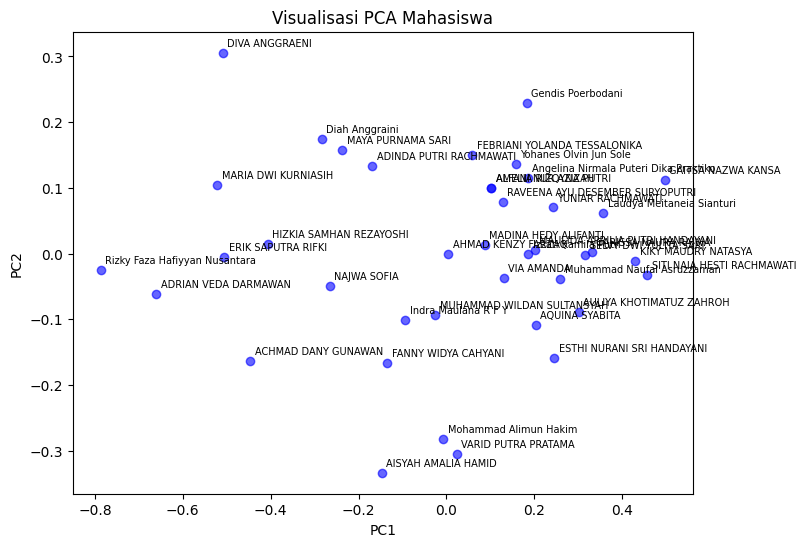

In [ ]:
#Data numerik
X = df_clean[["Adil_Amanah","Suka_Membantu","Nyambung_Ngobrol","Asyik_Menarik"]].values

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_clean["PC1"], df_clean["PC2"] = X_pca[:,0], X_pca[:,1]

plt.figure(figsize=(8,6))
plt.scatter(df_clean["PC1"], df_clean["PC2"], c="blue", alpha=0.6)
for i, nama in enumerate(df_clean["Nama"]):
    plt.text(df_clean["PC1"][i]+0.01, df_clean["PC2"][i]+0.01, nama, fontsize=7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi PCA Mahasiswa")
plt.show()


**Interpretasi Visualisasi**

Scatter Plot PCA

Visualisasi PCA menampilkan mahasiswa dalam bidang 2 dimensi berdasarkan kombinasi keempat kriteria.
PC1 banyak dipengaruhi oleh adil & amanah serta suka membantu.
PC2 cenderung dipengaruhi oleh nyambung ngobrol dan asyik menarik.
Mahasiswa yang berada di kuadran kanan atas menunjukkan keunggulan di hampir semua aspek, sementara yang di kiri bawah cenderung memiliki skor lebih rendah.

Dari sini terlihat siapa saja mahasiswa “unggul serba bisa” dibandingkan yang unggul di aspek tertentu saja.


**Clustering (K-Means)**

Tujuan: mengelompokkan mahasiswa berdasarkan kemiripan karakter.

Langkah:
Ambil data numerik.
Gunakan K-Means dengan misalnya 3 cluster.
Tambahkan kolom Cluster ke tabel mahasiswa.

Interpretasi:
Cluster 0 → mahasiswa dengan nilai rata-rata tinggi (sering muncul di top 4).
Cluster 1 → mahasiswa dengan nilai menengah.
Cluster 2 → mahasiswa dengan nilai rendah di beberapa aspek.

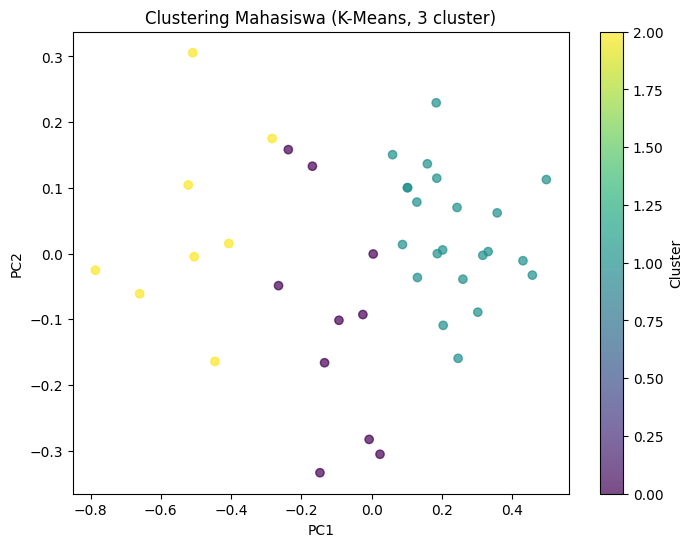

In [ ]:
#Clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(df_clean["PC1"], df_clean["PC2"], c=df_clean["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering Mahasiswa (K-Means, 3 cluster)")
plt.colorbar(label="Cluster")
plt.show()

**Interpretasi Visualisasi**

Clustering (K-Means)

Hasil clustering membagi mahasiswa menjadi 3 kelompok dengan warna berbeda.

Cluster 0 (unggul) → mahasiswa dengan skor rata-rata tinggi, sering kali juga muncul dalam top 4 pemeringkatan.

Cluster 1 (menengah) → mahasiswa dengan nilai moderat, unggul di beberapa aspek tapi lemah di aspek lain.

Cluster 2 (perlu perbaikan) → mahasiswa yang cenderung rendah di hampir semua kriteria.

Visualisasi ini memudahkan dosen atau pengajar untuk memahami pola kelompok sosial mahasiswa dan bisa menjadi acuan pembentukan tim belajar.


**Visualisasi Bonus**

Heatmap korelasi → menunjukkan hubungan antar kriteria.

Cosine similarity heatmap → menunjukkan siapa yang mirip siapa.

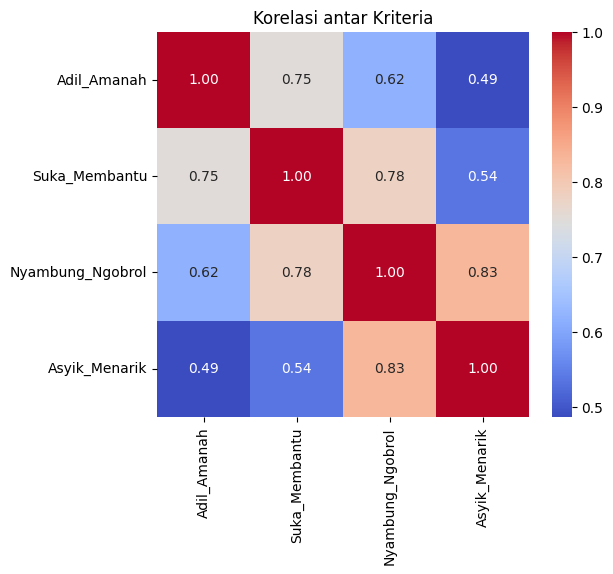

In [ ]:
#Heatmap Korelasi
plt.figure(figsize=(6,5))
sns.heatmap(df_clean[["Adil_Amanah","Suka_Membantu","Nyambung_Ngobrol","Asyik_Menarik"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Kriteria")
plt.show()

**Interpretasi Visualisasi**

Heatmap Korelasi antar Kriteria

Heatmap korelasi menunjukkan seberapa kuat hubungan antar setiap kriteria.

Korelasi tinggi antara Suka Membantu dan Asyik Menarik → mahasiswa yang suka menolong biasanya juga dianggap menyenangkan dalam pergaulan.

Korelasi sedang antara Nyambung Ngobrol dengan kriteria lain → kemampuan komunikasi mendukung keterhubungan dengan aspek sosial lainnya.

Adil & Amanah lebih independen, artinya sikap ini tidak selalu berkaitan dengan keasyikan atau komunikasi.

Dengan demikian, setiap kriteria memang memberi informasi unik, tidak sekadar duplikat dari kriteria lain.


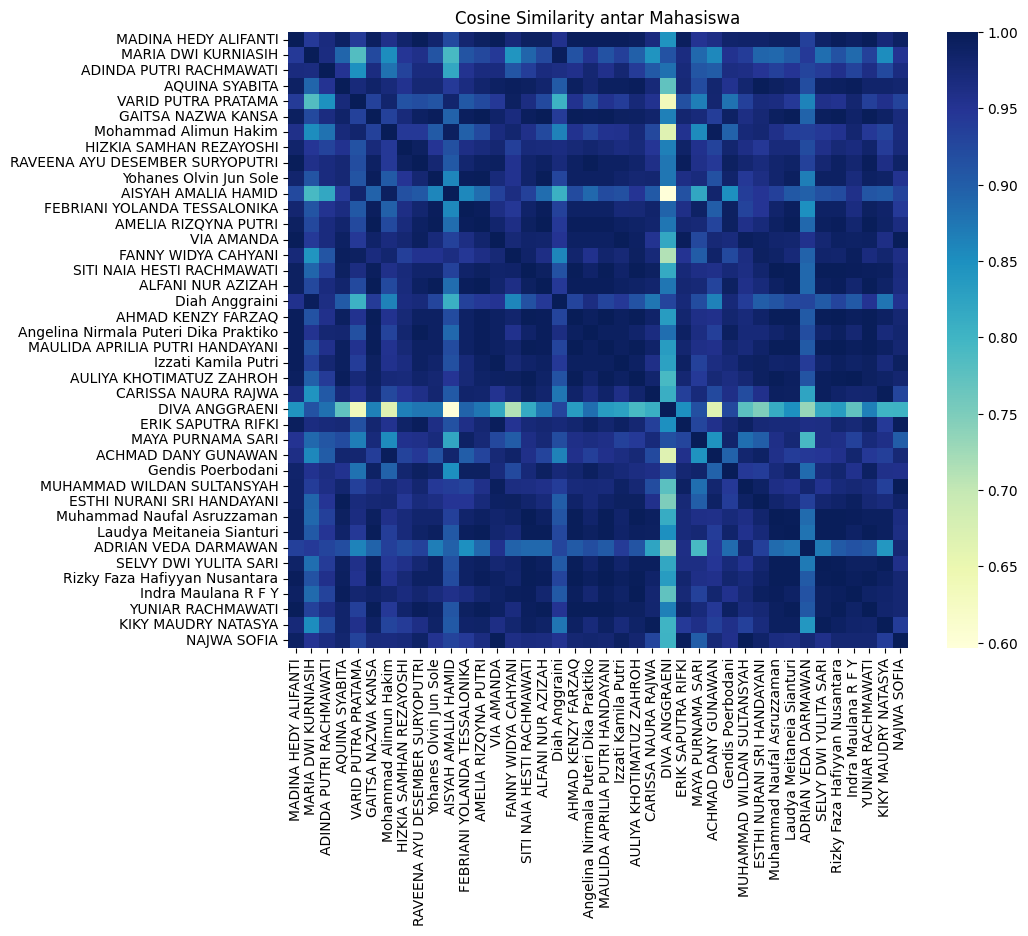

In [ ]:
#Cosine similarity
from numpy.linalg import norm
cosine_sim = (X @ X.T) / (norm(X, axis=1)[:, None] * norm(X, axis=1)[None, :])

plt.figure(figsize=(10,8))
sns.heatmap(cosine_sim, xticklabels=df_clean["Nama"], yticklabels=df_clean["Nama"], cmap="YlGnBu")
plt.title("Cosine Similarity antar Mahasiswa")
plt.show()

**Interpretasi Visualisasi**

Heatmap Cosine Similarity antar Mahasiswa

Heatmap cosine similarity menunjukkan tingkat kemiripan antar mahasiswa berdasarkan pola nilai keempat kriterianya.

Blok warna biru gelap menunjukkan mahasiswa dengan tingkat kemiripan yang sangat tinggi (nyaris identik).

Mahasiswa yang memiliki nilai sangat mirip kemungkinan akan cocok jika ditempatkan dalam kelompok kerja sama.

Sebaliknya, mahasiswa yang warna kotaknya lebih terang memiliki karakter yang berbeda, sehingga dapat dipertimbangkan untuk diversifikasi kelompok.

Visualisasi ini membantu mengenali siapa saja mahasiswa yang cenderung punya gaya sosial mirip, dan siapa yang berbeda.

**Kesimpulan akhir:**

Berdasarkan hasil analisis data mahasiswa dengan metode perkalian matriks
C⋅P, matriks kovarian, korelasi, cosine similarity, PCA, serta clustering, dapat ditarik beberapa poin utama:

1. **Pemeringkatan Mahasiswa**
Empat mahasiswa dengan skor tertinggi memiliki keseimbangan nilai yang baik pada keempat kriteria: adil & amanah, suka membantu, nyambung kalau ngobrol, serta asyik & menarik.
Mereka menonjol karena konsisten unggul di lebih dari satu aspek, bukan hanya dominan di satu kriteria saja.

2. **Hubungan antar Kriteria**
Dari matriks korelasi, terlihat adanya hubungan cukup kuat antara Suka Membantu dan Asyik & Menarik, yang menunjukkan bahwa mahasiswa yang suka membantu cenderung juga menyenangkan dalam pergaulan.
Sementara kriteria Adil & Amanah lebih berdiri sendiri, dengan korelasi lebih lemah terhadap aspek lain.

3. **Kesamaan Karakter Mahasiswa**
Cosine similarity memperlihatkan kelompok mahasiswa yang sangat mirip pola nilainya, artinya mereka memiliki kecenderungan karakteristik sosial yang serupa.
Mahasiswa dengan similarity tinggi berpotensi cocok bekerja sama dalam kelompok karena gaya interaksi mereka mirip.

4. **Analisis Lanjutan (PCA & Clustering)**
PCA mereduksi dimensi data menjadi dua komponen utama yang menjelaskan sebagian besar variasi. PC1 cenderung mewakili aspek adil–membantu, sedangkan PC2 lebih terkait nyambung–asyik.
Clustering (K-Means) berhasil membagi mahasiswa ke dalam tiga kelompok:
Kelompok unggul (skor tinggi di semua aspek),
Kelompok menengah (cukup baik tapi ada satu aspek yang kurang),
Kelompok yang masih perlu ditingkatkan (skor rendah di sebagian besar aspek).

Secara keseluruhan, analisis ini tidak hanya mampu menentukan mahasiswa terbaik berdasarkan kriteria yang ditentukan, tetapi juga memberi gambaran menyeluruh mengenai pola interaksi, kesamaan karakter, serta pengelompokan sosial di dalam kelas. Hasil ini dapat dijadikan dasar untuk pembentukan tim kerja yang seimbang dan strategi pengembangan karakter mahasiswa di masa depan.